In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('data/laptop_price.csv', encoding='latin1')

In [23]:
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [24]:
print(df['Ram'].dtype)
print(df['Weight'].dtype)

display(df[['Ram', 'Weight']].head())

str
str


,Ram,Weight
0,8GB,1.37kg
1,8GB,1.34kg
2,8GB,1.86kg
3,16GB,1.83kg
4,8GB,1.37kg


In [25]:
df.shape


(20, 13)

In [26]:
df.describe()

,laptop_ID,Inches,Price_euros
count,20.00000,20.000000,20.000000
mean,10.50000,14.295000,1407.334000
std,5.91608,1.304839,660.837233
min,1.00000,13.300000,229.000000
25%,5.75000,13.300000,955.985000
50%,10.50000,13.300000,1499.000000
75%,15.25000,15.600000,1827.450000
max,20.00000,17.300000,2537.450000


In [27]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         20 non-null     int64  
 1   Company           20 non-null     str    
 2   Product           20 non-null     str    
 3   TypeName          20 non-null     str    
 4   Inches            20 non-null     float64
 5   ScreenResolution  20 non-null     str    
 6   Cpu               20 non-null     str    
 7   Ram               20 non-null     str    
 8   Memory            20 non-null     str    
 9   Gpu               20 non-null     str    
 10  OpSys             20 non-null     str    
 11  Weight            20 non-null     str    
 12  Price_euros       20 non-null     float64
dtypes: float64(2), int64(1), str(10)
memory usage: 2.2 KB


In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='str')

In [30]:
if df['Ram'].dtype == 'object':
    df['Ram'] = df['Ram'].str.replace('GB','').astype(int)
if df['Weight'].dtype == 'object':
    df['Weight'] = df['Weight'].str.replace('kg','').astype('float')

In [31]:
category = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys']

In [32]:
df['ScreenResolution'].value_counts()

ScreenResolution
IPS Panel Full HD 1920x1080           8
Full HD 1920x1080                     6
IPS Panel Retina Display 2560x1600    2
1440x900                              1
IPS Panel Retina Display 2880x1800    1
1366x768                              1
IPS Panel 4K Ultra HD 3840x2160       1
Name: count, dtype: int64

In [33]:
display(df[['Ram', 'Weight']].head())

,Ram,Weight
0,8GB,1.37kg
1,8GB,1.34kg
2,8GB,1.86kg
3,16GB,1.83kg
4,8GB,1.37kg


In [34]:
df['Cpu'].value_counts()

Cpu
Intel Core i7 6500U 2.5GHz     8
Intel Core i5 6200U 2.3GHz     3
Intel Core i7 6700HQ 2.6GHz    3
Intel Core i5 2.3GHz           1
Intel Core i5 1.8GHz           1
Intel Core i5 7200U 2.5GHz     1
Intel Core i7 2.7GHz           1
Intel Core i5 3.1GHz           1
Intel Core i3 4005U 1.7GHz     1
Name: count, dtype: int64

In [35]:
category = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'Memory', 'ScreenResolution']

In [36]:
df_encoded_categorical = pd.get_dummies(df[category], drop_first=True)

In [37]:
df_encoded_categorical = df_encoded_categorical.astype(int)

In [38]:
# df_encoded.info() will be called after df_encoded is created in the next cell

In [39]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['Inches', 'Ram', 'Weight', 'Price_euros']


df_numerical = df[numerical_features]


df_encoded = pd.concat([df_encoded_categorical, df_numerical], axis=1)

scaler = StandardScaler()

df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

ValueError: could not convert string to float: '8GB'

In [ ]:
# Complete data preparation in one cell
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and prepare data
df = pd.read_csv('data/laptop_price.csv', encoding='latin1')

# Clean Ram and Weight columns
if df['Ram'].dtype == 'object':
    df['Ram'] = df['Ram'].str.replace('GB','').astype(int)
if df['Weight'].dtype == 'object':
    df['Weight'] = df['Weight'].str.replace('kg','').astype('float')

# Encode categorical variables
category = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'Memory', 'ScreenResolution']
df_encoded_categorical = pd.get_dummies(df[category], drop_first=True)
df_encoded_categorical = df_encoded_categorical.astype(int)

# Scale numerical features
numerical_features = ['Inches', 'Ram', 'Weight', 'Price_euros']
df_numerical = df[numerical_features]
scaler = StandardScaler()
df_numerical[numerical_features] = scaler.fit_transform(df_numerical[numerical_features])

# Combine features
df_encoded = pd.concat([df_encoded_categorical, df_numerical], axis=1)

# Train-test split
X = df_encoded.drop('Price_euros', axis=1)
y = df_encoded['Price_euros']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation complete!")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

In [ ]:
y_train.shape

(16,)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[early])

(16, 37)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Complete data preparation and model creation (FIXED)
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and prepare data
df = pd.read_csv('data/laptop_price.csv', encoding='latin1')

# Clean Ram and Weight columns
if df['Ram'].dtype == 'object':
    df['Ram'] = df['Ram'].str.replace('GB','').astype(int)
if df['Weight'].dtype == 'object':
    df['Weight'] = df['Weight'].str.replace('kg','').astype('float')

# Encode categorical variables
category = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'Memory', 'ScreenResolution']
df_encoded_categorical = pd.get_dummies(df[category], drop_first=True)
df_encoded_categorical = df_encoded_categorical.astype(int)

# Get numerical features and ensure they're numeric
numerical_features = ['Inches', 'Ram', 'Weight', 'Price_euros']
df_numerical = df[numerical_features].copy()

# Convert to numeric if needed
for feature in numerical_features:
    df_numerical[feature] = pd.to_numeric(df_numerical[feature], errors='coerce')

# Scale numerical features
scaler_X = StandardScaler()
df_numerical[numerical_features] = scaler_X.fit_transform(df_numerical[numerical_features])

# Scale target variable separately (IMPORTANT!)
scaler_y = StandardScaler()
df_numerical['Price_euros'] = scaler_y.fit_transform(df_numerical[['Price_euros']])

# Combine features
df_encoded = pd.concat([df_encoded_categorical, df_numerical], axis=1)

# Train-test split
X = df_encoded.drop('Price_euros', axis=1)
y = df_encoded['Price_euros']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation complete!")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"Training samples: {len(x_train)}")

# Build the model
model = Sequential()
input_dim = x_train.shape[1]
model.add(Dense(units=128, activation='relu', input_shape = (input_dim,)))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Linear output for regression

print("\nModel created successfully!")
model.summary()

d:\placement\ml projects\ANN project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1207: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\placement\ml projects\ANN project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1212: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\placement\ml projects\ANN project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1236: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
d:\placement\ml projects\ANN project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Data preparation complete!
x_train shape: (16, 37)

Model created successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,745 (124.00 KB)

 Trainable params: 31,745 (124.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=[early])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,882 (230.01 KB)

 Trainable params: 58,882 (230.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model with proper learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
# Train model with proper batch size
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = model.fit(
    x_train, y_train, 
    epochs=100, 
    validation_split=0.2, 
    batch_size=4,  # Small batch for small dataset
    callbacks=[early]
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.2421 - mean_absolute_error: 0.9877 - val_loss: 0.9735 - val_mean_absolute_error: 0.6963
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.2419 - mean_absolute_error: 0.9876 - val_loss: 0.9750 - val_mean_absolute_error: 0.6963
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.2413 - mean_absolute_error: 0.9873 - val_loss: 0.9761 - val_mean_absolute_error: 0.6963
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.2412 - mean_absolute_error: 0.9871 - val_loss: 0.9775 - val_mean_absolute_error: 0.6963
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.2407 - mean_absolute_error: 0.9869 - val_loss: 0.9785 - val_mean_absolute_error: 0.6963
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.2410 - mean_absolute_error: 0.9869 - val_loss: 0.9800 - val_mean_absolute_error: 0.6963
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.2401 - mean_absolute_error: 0.9866 - val_loss: 0.981

In [ ]:
# Make predictions and inverse transform
y_pred_scaled = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
y_pred_train = model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [ ]:
# Try a simpler model - reduce overfitting
simple_model = Sequential()
simple_model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[1],)))
simple_model.add(Dropout(0.3))
simple_model.add(Dense(units=16, activation='relu'))
simple_model.add(Dense(units=1, activation='linear'))

simple_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

simple_history = simple_model.fit(
    x_train, y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=4,
    verbose=1
)

print("\nSimple model summary:")
simple_model.summary()

Epoch 1/100


d:\placement\ml projects\ANN project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 1.2424 - mae: 0.9880 - val_loss: 0.9882 - val_mae: 0.6963
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2355 - mae: 0.9840 - val_loss: 1.0064 - val_mae: 0.6963
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.2316 - mae: 0.9811 - val_loss: 1.0264 - val_mae: 0.6963
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.2273 - mae: 0.9792 - val_loss: 1.0393 - val_mae: 0.6963
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.2257 - mae: 0.9770 - val_loss: 1.0555 - val_mae: 0.6963
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.2235 - mae: 0.9755 - val_loss: 1.0648 - val_mae: 0.6963
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2250 - mae: 0.9746 - val_loss: 1.0787 - val_mae: 0.6963
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.2226 - mae: 0.9725 - val_loss: 1.0898 - val_mae: 0.6963
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.2245 - mae: 0.9726 - val

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,285 (20.65 KB)

 Trainable params: 1,761 (6.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,524 (13.77 KB)

In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(simple_history.history['loss'], label='Training Loss')
plt.plot(simple_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(simple_history.history['mae'], label='Training MAE')
plt.plot(simple_history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Also plot the original requested plot
plt.figure(figsize=(8, 6))
plt.plot(simple_history.history['loss'], label='Training Loss')
plt.plot(simple_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

MSE: 1.174801521943428
MAE: 0.9149423551343886
R2: -0.00039368303025155704


Plotting existing simple_model training history...
simple_history not found or other variables missing. Preparing data and training the simple model first...
x_train or y_train not found. Running data preparation...
Data preparation complete!
Training simple model...


d:\placement\ml projects\ANN project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1207: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\placement\ml projects\ANN project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1212: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\placement\ml projects\ANN project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1236: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
d:\placement\ml projects\ANN project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 1.2525 - mae: 0.9913 - val_loss: 0.9776 - val_mae: 0.6963
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.2419 - mae: 0.9875 - val_loss: 0.9807 - val_mae: 0.6963
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2403 - mae: 0.9869 - val_loss: 0.9875 - val_mae: 0.6963
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.2376 - mae: 0.9853 - val_loss: 0.9945 - val_mae: 0.6963
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.2367 - mae: 0.9843 - val_loss: 1.0023 - val_mae: 0.6963
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.2357 - mae: 0.9834 - val_loss: 1.0115 - val_mae: 0.6963
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.2319 - mae: 0.9819 - val_loss: 1.0184 - val_mae: 0.6963
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2310 - mae: 0.9810 - val_loss: 1.0254 - val_mae: 0.6963
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.2289 - mae: 

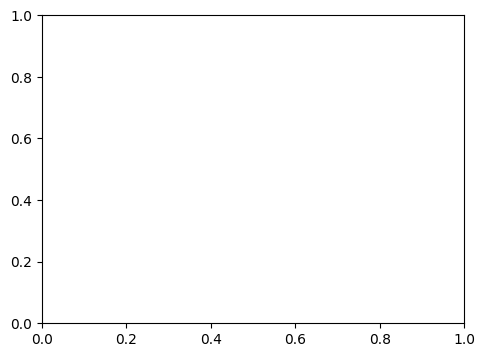

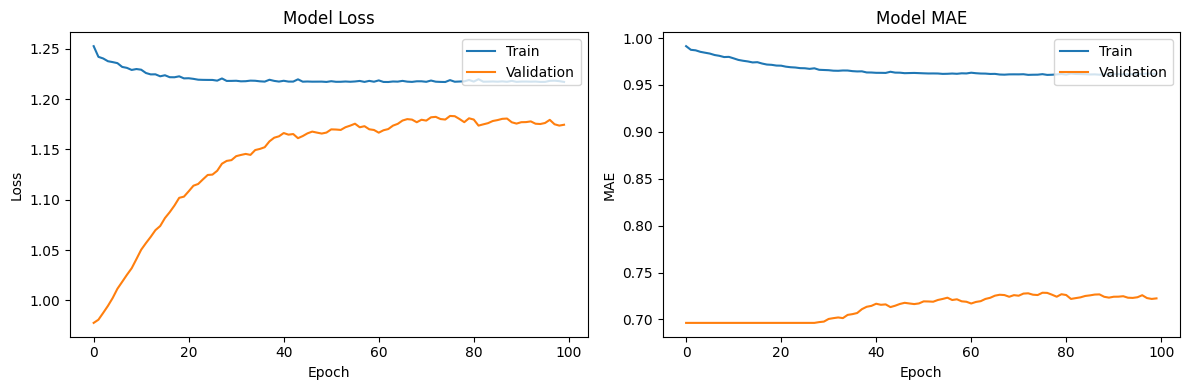

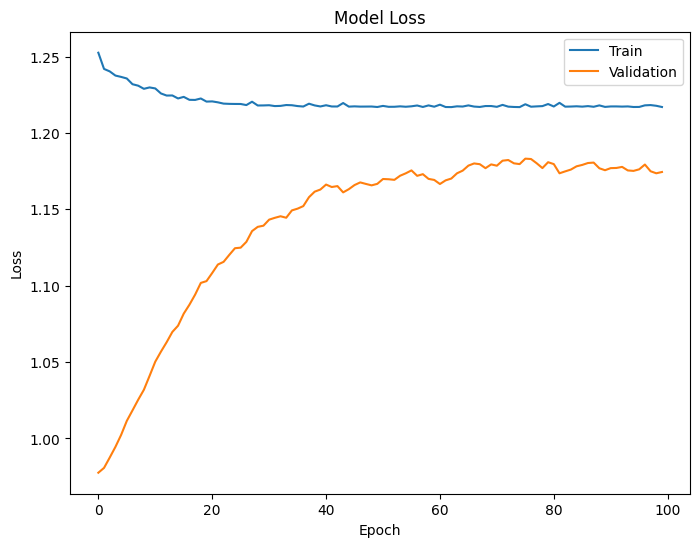

In [3]:
# Complete plotting cell - run this after training the simple model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Check if simple_history exists, if not train the simple model first
try:
    # Attempt to plot existing simple_history
    print("Plotting existing simple_model training history...")
    
    plt.figure(figsize=(12, 4))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(simple_history.history['loss'], label='Training Loss')
    plt.plot(simple_history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(simple_history.history['mae'], label='Training MAE')
    plt.plot(simple_history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Original requested plot
    plt.figure(figsize=(8, 6))
    plt.plot(simple_history.history['loss'], label='Training Loss')
    plt.plot(simple_history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    
except NameError:
    print("simple_history not found or other variables missing. Preparing data and training the simple model first...")
    
    # Ensure data is prepared if not already
    if 'x_train' not in locals() or 'y_train' not in locals():
        print("x_train or y_train not found. Running data preparation...")
        # Load and prepare data (copying from cell 23 for self-containment)
        df = pd.read_csv('data/laptop_price.csv', encoding='latin1')

        # Clean Ram and Weight columns
        if df['Ram'].dtype == 'object':
            df['Ram'] = df['Ram'].str.replace('GB','').astype(int)
        if df['Weight'].dtype == 'object':
            df['Weight'] = df['Weight'].str.replace('kg','').astype('float')

        # Encode categorical variables
        category = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'Memory', 'ScreenResolution']
        df_encoded_categorical = pd.get_dummies(df[category], drop_first=True)
        df_encoded_categorical = df_encoded_categorical.astype(int)

        # Get numerical features and ensure they're numeric
        numerical_features = ['Inches', 'Ram', 'Weight', 'Price_euros']
        df_numerical = df[numerical_features].copy()

        # Convert to numeric if needed
        for feature in numerical_features:
            df_numerical[feature] = pd.to_numeric(df_numerical[feature], errors='coerce')

        # Scale numerical features
        scaler_X = StandardScaler()
        df_numerical[numerical_features] = scaler_X.fit_transform(df_numerical[numerical_features])

        # Scale target variable separately (IMPORTANT!)
        scaler_y = StandardScaler()
        df_numerical['Price_euros'] = scaler_y.fit_transform(df_numerical[['Price_euros']])

        # Combine features
        df_encoded = pd.concat([df_encoded_categorical, df_numerical], axis=1)

        # Train-test split
        X = df_encoded.drop('Price_euros', axis=1)
        y = df_encoded['Price_euros']
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        print("Data preparation complete!")
    
    # Train simple model
    print("Training simple model...")
    simple_model = Sequential()
    simple_model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[1],)))
    simple_model.add(Dropout(0.3))
    simple_model.add(Dense(units=16, activation='relu'))
    simple_model.add(Dense(units=1, activation='linear'))
    
    simple_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])
    
    simple_history = simple_model.fit(
        x_train, y_train,
        epochs=100,
        validation_split=0.2,
        batch_size=4,
        verbose=1
    )
    
    print("\nSimple model trained successfully! Now plotting...")
    
    # Plot the results
    plt.figure(figsize=(12, 4))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(simple_history.history['loss'], label='Training Loss')
    plt.plot(simple_history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(simple_history.history['mae'], label='Training MAE')
    plt.plot(simple_history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Original requested plot
    plt.figure(figsize=(8, 6))
    plt.plot(simple_history.history['loss'], label='Training Loss')
    plt.plot(simple_history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()